# Busqueda de caracteristicas

### Identificación del victimario (Guerrilla /Campesino de la Zona / Presunto Testaferro / Bacrim / Paramilitar / Entidad del Estado / Persona Jurídica / Persona Natural /Simpatizante de Grupo Armado o Bacrim / Empresa)

In [46]:

def renaming_keys(lines):
    for i in range(len(lines)):
        lines[i] = lines[f"page"+str(i)]
        del lines[f"page"+str(i)]
    return lines


In [47]:
def concat_text_sentence(dictionary_file):
    nested_text = ""
    for key, value in sorted(dictionary_file.items(), key=lambda item: int(item[0])):
        nested_text = nested_text+" "+dictionary_file[key] 
    return nested_text

In [48]:
list_margen = ["Farc","farc","ELN","Bacrim","bacrim","Paramilitar","Paramilitares","clan del golfo","rastrojos"]

In [49]:
def count_groups_margen(text:str):
    list_result = {}
    for item_margen in list_margen:
        list_result[item_margen] = text.count(item_margen)
    return list_result

In [50]:
import operator

def get_group(max_dict):
    new_ma_val = max(max_dict.items(), key=operator.itemgetter(1))[0]
    return new_ma_val


In [51]:
import os
import json

path = 'output_txt_v1/ouput_txt/'
files = os.listdir(path)
total_text = ''
dict_margen = {"Farc":0,"farc":0,"ELN":0,"Bacrim":0,"bacrim":0,"Paramilitar":0,"Paramilitares":0,"clan del golfo":0,"rastrojos":0}
for file in files:
    print(f'Reading file {file}')
    with open(path+file) as f:
        lines = f.readlines()
        lines=lines[0]
        lines = json.loads(lines)
        lines = renaming_keys(lines)
        lines = concat_text_sentence(lines)
        group_margen = count_groups_margen(lines)
        name_margen = get_group(group_margen)
        dict_margen[name_margen] = int(dict_margen[name_margen]) + 1 
dict_margen


Reading file 540013121002-201300097-00  Tibú  16 febrero 2018.txt
Reading file 050453121002-201400055-01 Chigorodó 22 noviembre 2018.txt
Reading file 2016-00074 Remolino 15 Enero 2018.txt
Reading file 470013121002-201300074-00 Ciénaga 11 junio 2015.txt
Reading file 190013121001-201500164-00  Santander de Quilichao  01 Diciembre 2017.txt
Reading file 470013121001-201400089-00 Remolino 04 diciembre 2015.txt
Reading file 540013121001-201300051-01 Tibú 21 Junio 2018.txt
Reading file 470013121002-201400025-00  Remolino  14 Diciembre 2016.txt
Reading file 540013121002-201500006-00 Cúcuta 22 Marzo 2019.txt
Reading file 528353121001-201300112-00 Tablón de Gómez 12 Diciembre 2017.txt
Reading file 050453121001-201601732-00 Chigorodó 19 Diciembre 2017.txt
Reading file 540013121002-201300204-00 Cúcuta 24 Marzo 2015.txt
Reading file 520013121003-201600128-00 Tablón de Gómez 22 Marzo 2019.txt
Reading file 470013121002-201300092-00 Ciénaga 28 enero 2015.txt
Reading file 540013121002-201300225-01 Tibú

In [53]:
dict_margen

{'Farc': 18,
 'farc': 1,
 'ELN': 30,
 'Bacrim': 0,
 'bacrim': 0,
 'Paramilitar': 1,
 'Paramilitares': 0,
 'clan del golfo': 0,
 'rastrojos': 0}

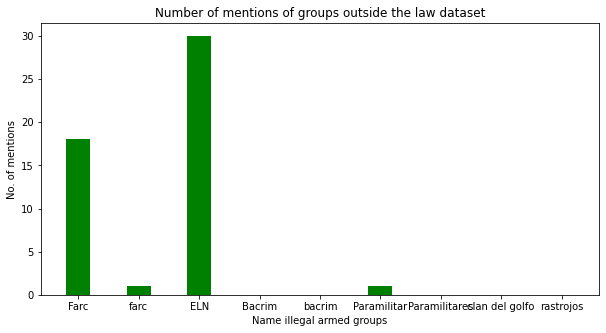

In [54]:
import matplotlib.pyplot as plt
 
  
# creating the dataset
groups = list(dict_margen.keys())
values = list(dict_margen.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(groups, values, color ='green',
        width = 0.4)
 
plt.xlabel("Name illegal armed groups")
plt.ylabel("No. of mentions")
plt.title("Number of mentions of groups outside the law dataset")
plt.show()